# COMMUNICATE DATA FINDINGS

## SF Bay Area Bike Share  - Ford GoBike Data

## INTRODUCTION

This dataset was found on Kaggle (Link below) and includes ride sharing data from August 2013 to August 2015 and include several csv files for trip data, weather data and station data.
In the first part of this project, I will merge all 3 data sets and clean the master sheet to make it easier to analyse.
Secondly, I will generate simple visualisation and run queries and data grouping to better understand the data and trends.
Finally, based on the findings from the second part, I will create the necessary graph to present the main trends and findings of this data set.

Each part will include notes and explanation but please refer to the readme.txt file for more information.

https://www.kaggle.com/benhamner/sf-bay-area-bike-share

## PART I - DATASET INITIAL ANALYSIS & CLEANING 

**In this part, I will merge the 3 data sets, review the data and clean it to help me explore the dataframe**

### 1.1 Importing the right tools

In [585]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 

%matplotlib inline

### 1.2 Opening the CSV files

In [827]:
df_trip = pd.read_csv('trip.csv')
df_weather = pd.read_csv('weather.csv')
df_station = pd.read_csv('station.csv')
pd.set_option('display.max_columns', 500)

### 1.3 Reviewing the datasets to decide how to merge them

In [828]:
df_trip.head()



,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


**Looking for duplicates**

In [829]:
df_trip['id'].duplicated().any()

False

In [830]:
df_weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,30.05,30.00,29.93,10.0,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,30.00,29.96,29.92,10.0,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,29.96,29.93,29.91,10.0,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,29.94,29.90,10.0,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


**Looking for duplicates**

In [831]:
df_weather['date'].duplicated().any()

True

**I will have to remove the duplicated dates**

In [832]:
df_station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


**Looking for duplicates:**

In [833]:
df_station['id'].duplicated().any()

False

**NOTE:**
<li>I will first need to separate the date and time from the trip file so that the date column can be used as key for the merge</li>
<li>I will have to remove the duplicated dates</li>
<li>There are 2 station columns on the trip file so I will have to first merge the station file on start station and then again on end station</li>


### DEFINE: Separating the date and time in two different columns.

### CODE:

In [834]:
# Creating 2 new columns
df_trip[['date','time_start']] = df_trip.start_date.str.split(expand=True) 
df_trip[['date_end','time_end']] = df_trip.start_date.str.split(expand=True)

### TEST:

In [835]:
#There should now be 2 new columns including the date that will be used as a merge key
df_trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,time_start,date_end,time_end
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,8/29/2013,14:13,8/29/2013,14:13
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,8/29/2013,14:42,8/29/2013,14:42
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,8/29/2013,10:16,8/29/2013,10:16
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,8/29/2013,11:29,8/29/2013,11:29
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,8/29/2013,12:02,8/29/2013,12:02


### DEFINE: Removing the duplicated dates

### CODE:

In [836]:
df_weather = df_weather.drop_duplicates(subset='date', keep='first')

### TEST:

In [837]:
# This should return false
df_weather['date'].duplicated().any()

False

### DEFINE: Merging the weather data with the trip data

### CODE:

In [838]:
df = pd.merge(df_trip,df_weather,on='date')

### TEST:

In [839]:
# The new columns should now be in the final df

df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code_x,date,time_start,date_end,time_end,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,8/29/2013,14:13,8/29/2013,14:13,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,8/29/2013,14:42,8/29/2013,14:42,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,8/29/2013,10:16,8/29/2013,10:16,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,8/29/2013,11:29,8/29/2013,11:29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,8/29/2013,12:02,8/29/2013,12:02,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107


### DEFINE: Adding the start station info

### CODE:

In [840]:
df = pd.merge(df, df_station, how='left', left_on=['start_station_id'], right_on=['id'])

### TEST:

In [841]:
df.head()

,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code_x,date,time_start,date_end,time_end,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y,id_y,name,lat,long,dock_count,city,installation_date
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,8/29/2013,14:13,8/29/2013,14:13,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,8/29/2013,14:42,8/29/2013,14:42,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,8/29/2013,10:16,8/29/2013,10:16,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,27,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,8/29/2013,11:29,8/29/2013,11:29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,8/29/2013,12:02,8/29/2013,12:02,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013


### DEFINE: Renaming the new columns 

### CODE:

In [842]:
df.rename({'id_y':'idstart','name':'startname','lat':'startlat','long':'startlong','dock_count': 'start_dock_ct', 'city': 'start_city', 'installation_date' :'start_install_dt'}, axis=1, inplace=True)

### TEST:

In [843]:
df.head()

,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code_x,date,time_start,date_end,time_end,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y,idstart,startname,startlat,startlong,start_dock_ct,start_city,start_install_dt
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,8/29/2013,14:13,8/29/2013,14:13,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,8/29/2013,14:42,8/29/2013,14:42,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,8/29/2013,10:16,8/29/2013,10:16,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,27,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,8/29/2013,11:29,8/29/2013,11:29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,8/29/2013,12:02,8/29/2013,12:02,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013


### DEFINE: Merging the end station info

### CODE:

In [844]:
df = pd.merge(df, df_station, how='left', left_on=['end_station_id'], right_on=['id'])

### TEST:

In [845]:
df.head()

,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code_x,date,time_start,date_end,time_end,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y,idstart,startname,startlat,startlong,start_dock_ct,start_city,start_install_dt,id,name,lat,long,dock_count,city,installation_date
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,8/29/2013,14:13,8/29/2013,14:13,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,8/29/2013,14:42,8/29/2013,14:42,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,8/29/2013,10:16,8/29/2013,10:16,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,27,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013,27,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,8/29/2013,11:29,8/29/2013,11:29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,8/29/2013,12:02,8/29/2013,12:02,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,67,Market at 10th,37.776619,-122.417385,27,San Francisco,8/23/2013


### DEFINE: Renaming columns 

### CODE :

In [846]:
df.rename({'id':'idend','name':'endname','lat':'endlat','long':'endlong','dock_count': 'end_dock_ct', 'city': 'end_city', 'installation_date' :'end_install_dt'}, axis=1, inplace=True)


### TEST:

In [847]:
df.head()

,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code_x,date,time_start,date_end,time_end,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y,idstart,startname,startlat,startlong,start_dock_ct,start_city,start_install_dt,idend,endname,endlat,endlong,end_dock_ct,end_city,end_install_dt
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,8/29/2013,14:13,8/29/2013,14:13,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,8/29/2013,14:42,8/29/2013,14:42,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,8/29/2013,10:16,8/29/2013,10:16,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,27,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013,27,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,8/29/2013,11:29,8/29/2013,11:29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,8/29/2013,12:02,8/29/2013,12:02,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,67,Market at 10th,37.776619,-122.417385,27,San Francisco,8/23/2013


### DEFINE: Setting all dates as datetype and extracting year, month and day of week

### CODE:

In [848]:
# Setting the dates as datetime object
df['date']= pd.to_datetime(df['date'])
df['date_end']= pd.to_datetime(df['date_end'])

In [849]:
# Extracting the month and year
df['start_month'] = df['date'].dt.month
df['end_month'] = df['date_end'].dt.month
df['start_year'] = df['date'].dt.year
df['end_year'] = df['date_end'].dt.year


In [850]:
# Extracting the day of the week ( I used this article: stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date )

df['start_day_week'] = df['date'].apply(lambda time: time.dayofweek)
df['end_day_week'] = df['date_end'].apply(lambda time: time.dayofweek)

In [1048]:
# Creating a column with only the month and year 
df['month_year_start'] =  df['date'].values.astype('datetime64[M]')
df['start_install_dt']= pd.to_datetime(df['start_install_dt'])
df['start_install_month'] = df['start_install_dt'].values.astype('datetime64[M]')

In [852]:
# Creating a column with a simplified time for broad analysis
df[['start_hour','start_min']] = df.time_start.str.split(":",expand=True)
df[['end_hour','end_min']] = df.time_end.str.split(":",expand=True)

In [853]:
df['start_hour'] = df['start_hour'].astype('int')

In [854]:
df.head()

,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code_x,date,time_start,date_end,time_end,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y,idstart,startname,startlat,startlong,start_dock_ct,start_city,start_install_dt,idend,endname,endlat,endlong,end_dock_ct,end_city,end_install_dt,start_month,end_month,start_year,end_year,start_day_week,end_day_week,month_year_start,start_hour,start_min,end_hour,end_min
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,14:13,2013-08-29,14:13,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,8,8,2013,2013,3,3,2013-08-01,14,13,14,13
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,14:42,2013-08-29,14:42,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,8,8,2013,2013,3,3,2013-08-01,14,42,14,42
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,10:16,2013-08-29,10:16,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,27,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013,27,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013,8,8,2013,2013,3,3,2013-08-01,10,16,10,16
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,2013-08-29,11:29,2013-08-29,11:29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,8,8,2013,2013,3,3,2013-08-01,11,29,11,29
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,2013-08-29,12:02,2013-08-29,12:02,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,67,Market at 10th,37.776619,-122.417385,27,San Francisco,8/23/2013,8,8,2013,2013,3,3,2013-08-01,12,02,12,02


### TEST:

In [855]:
df.head()

,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code_x,date,time_start,date_end,time_end,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y,idstart,startname,startlat,startlong,start_dock_ct,start_city,start_install_dt,idend,endname,endlat,endlong,end_dock_ct,end_city,end_install_dt,start_month,end_month,start_year,end_year,start_day_week,end_day_week,month_year_start,start_hour,start_min,end_hour,end_min
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,14:13,2013-08-29,14:13,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,8,8,2013,2013,3,3,2013-08-01,14,13,14,13
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,14:42,2013-08-29,14:42,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,8,8,2013,2013,3,3,2013-08-01,14,42,14,42
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,10:16,2013-08-29,10:16,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,27,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013,27,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013,8,8,2013,2013,3,3,2013-08-01,10,16,10,16
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,2013-08-29,11:29,2013-08-29,11:29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,8,8,2013,2013,3,3,2013-08-01,11,29,11,29
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,2013-08-29,12:02,2013-08-29,12:02,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,67,Market at 10th,37.776619,-122.417385,27,San Francisco,8/23/2013,8,8,2013,2013,3,3,2013-08-01,12,02,12,02


### Saving the master file

In [856]:
# Saving the master file as a csv
df.to_csv('sf_bike_final.csv')

## PART II - EXPLORATORY PART

## 2.1 - Univariate analysis

### Average riding time

In [1394]:
# Getting the mean duration of ride in minute
average_ride_sec = df['duration'].sum() / df['id_x'].nunique()
average_ride_min = (df['duration'].sum() / df['id_x'].nunique())/60
print(average_ride_sec)
print(average_ride_min)

1107.9498461846172
18.46583076974362


### Overview of the main start cities

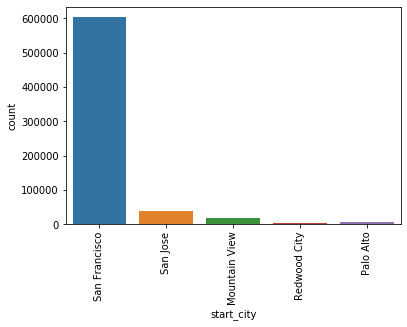

In [1395]:
sb.countplot(data=df, x= 'start_city');
plt.xticks(rotation = 90);

**Note:**
San Francisco clearly stands out, I will check if the trend is the same for end cities

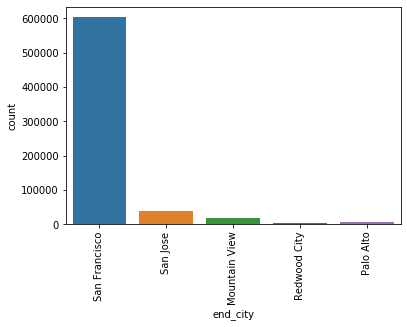

In [1396]:
sb.countplot(data=df, x= 'end_city');
plt.xticks(rotation = 90);

**Note:**
The trend seems to be similar

### Reviewing the type of customers

In [1654]:
df.groupby('subscription_type')['id_x'].nunique()

subscription_type
Customer      103213
Subscriber    566746
Name: id_x, dtype: int64

In [1658]:
total= 103213 + 566756
print(total)

cust = 103213/669969
sub = 566756/ 669969
print(cust)
print(sub)

669969
0.15405638171318375
0.8459436182868163


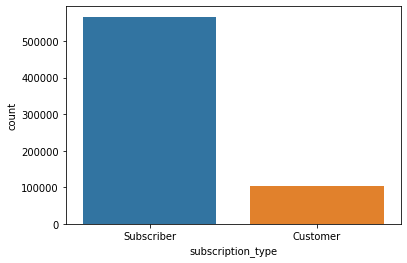

In [1397]:
sb.countplot(data=df, x= 'subscription_type');


**Note:**
The majority of users have a subscriptions, it would be interesting to compare the usage behaviour of both

### Looking for monthly trends

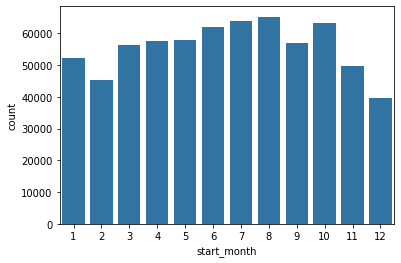

In [1398]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x= 'start_month', color = base_color);



**Note:**
There doesn't seem to be a clear seasonality. The summer month have a slightly higher volume so I'll compare it with the temperature data to get a clearer picture.

### Looking for Daily trends

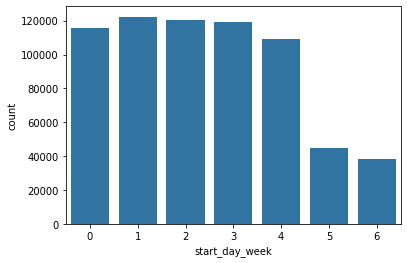

In [1399]:
base_color = sb.color_palette()[0]
sb.countplot(data=df, x= 'start_day_week',color = base_color);


**Note:**
I would have expected the weekends (5 & 6) to have a higher volume of data but it's the contrary. My initial thought is that the bikes are mainly used for commuting but I will take a closer look later on.

## 2.2 - Bivariate Analysis

### Reviewing the evolution of bike trips popularity from 2013 to August 2015

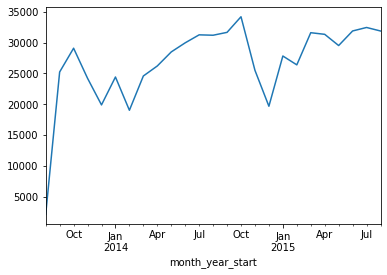

In [1400]:
df.groupby('month_year_start')['id_x'].nunique().plot()


### How does the weather impact the volume of trips

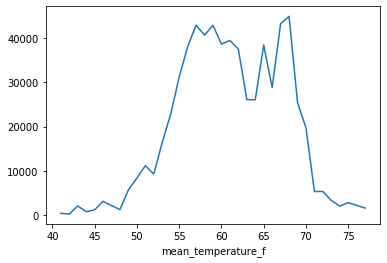

In [1401]:
df.groupby('mean_temperature_f')['id_x'].nunique().plot();

**Note:**
This graph makes it look like weather and rides are correlated but if the temperature in SF is always between 50 and 70 then this shows nothing. I will follow up with a correlation analysis

## 2.3 - Multivariate Analysis

### Reviewing bike rides per month and median temperature

In [1402]:
# Pivoting the month, temperature mean and count of ride id
dfmt = pd.pivot_table(data=df, index=['month_year_start'], values=['mean_temperature_f', 'id_x'], aggfunc={'mean_temperature_f':'median', 'id_x': 'count'}).reset_index()

In [1403]:
# Checking the pivot worked
dfmt.head()

,month_year_start,id_x,mean_temperature_f
0,2013-08-01,2102,68.0
1,2013-09-01,25243,66.0
2,2013-10-01,29105,62.0
3,2013-11-01,24219,58.0
4,2013-12-01,19894,50.0


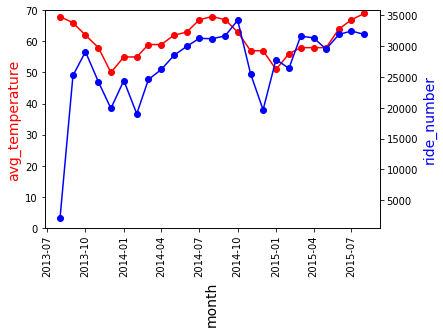

In [1404]:
# Adding 2 y axis, I used this article to understand how to do it: https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

fig,ax = plt.subplots()
ax.plot( dfmt.month_year_start,dfmt.mean_temperature_f, color="red", marker="o")
# set x-axis label
ax.set_xlabel("month",fontsize=14, rotation = 90)
plt.xticks(rotation =90)
# set y-axis label
ax.set_ylabel("avg_temperature",color="red",fontsize=14)
ax.set_ylim([0,70])
# twin object for the y-axis
ax2=ax.twinx()
ax2.plot(dfmt.month_year_start, dfmt['id_x'],color="blue",marker="o")
ax2.set_ylabel("ride_number",color="blue",fontsize=14)
ax.set_ylim([0,70])
plt.show()


**Note:**
The 2 lines seem to be correlated but Decemver 2014 seems to be affected by another factor, I will review it later.

In [1601]:
# Checking the correlation factor

dfmt.corr()

,id_x,mean_temperature_f
id_x,1.000000,0.185578
mean_temperature_f,0.185578,1.000000


**Note:**
This confirms that the weather does impact the number of ride. It would be interesting to see if it affects differently subscribers/customer and if it changes over the weekend

### Looking for the "Bike rush hour" using a heatmap

In [1406]:
#Creating a separate dataframe with the 3 informations I need 

dfhm = df.groupby(['start_hour', 'start_day_week'])['id_x'].count()


In [1407]:
# Resetting the index

dfhm = dfhm.reset_index()


In [1408]:
# Pivoting the data

heatmap = dfhm.pivot('start_hour', 'start_day_week', 'id_x').sort_values('start_hour', ascending=True)


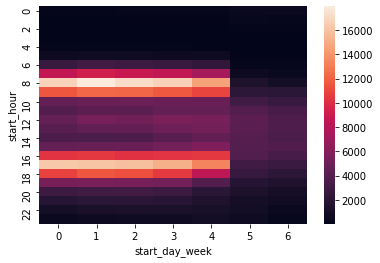

In [1409]:
# Creating the final heatmap, I used this article to help me: seaborn.pydata.org/generated/seaborn.heatmap.html

sb.heatmap(heatmap);

**Note**
As seen previously, San Francisco residents tend to use these bikes during the weekdays and especially during commuting hours. 

### Looking for the impact of rain on bike trips length

In [1624]:
# Checking the precipitation rows
df.groupby('precipitation_inches')['id_x'].nunique().nlargest(10)

precipitation_inches
0       548073
T        68170
0.01     16898
0.02      3028
0.11      1998
0.15      1833
0.32      1813
0.1       1726
0.43      1569
0.08      1452
Name: id_x, dtype: int64

In [1631]:
# Some rows have "T" instead of an actual value, I'll filter only the values for this analysis

dfp = df.query('precipitation_inches != "T"')


In [1632]:
dfp = dfp.reset_index()

In [1633]:
dfp = dfp.query('month_year_start > = "2013-09-01"').reset_index()

In [1634]:
dfp['precipitation_inches'] = dfp['precipitation_inches'].astype('float64')



In [1635]:
# Pivoting the month, temperature mean and count of ride id
dfp = pd.pivot_table(data=dfp, index=['month_year_start'], values=['precipitation_inches', 'id_x'], aggfunc={'precipitation_inches':'median', 'id_x': 'count'}).reset_index()

In [1636]:
#Looking for a correlation between rain and bike ride

dfp.corr()

,id_x,precipitation_inches
id_x,1.000000,-0.418199
precipitation_inches,-0.418199,1.000000


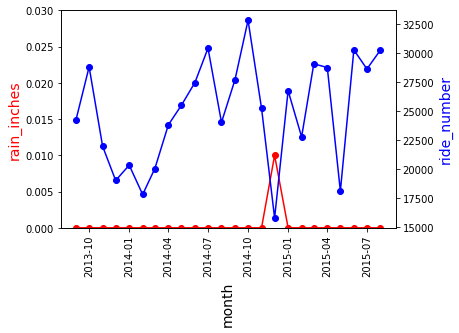

In [1637]:

fig,ax = plt.subplots()
ax.plot( dfp.month_year_start,dfp.precipitation_inches, color="red", marker="o")
# set x-axis label
ax.set_xlabel("month",fontsize=14, rotation = 90)
plt.xticks(rotation =90)
# set y-axis label
ax.set_ylabel("rain_inches",color="red",fontsize=14)
ax.set_ylim([0,70])
# twin object for the y-axis
ax2=ax.twinx()
ax2.plot(dfp.month_year_start, dfp['id_x'],color="blue",marker="o")
ax2.set_ylabel("ride_number",color="blue",fontsize=14)
ax.set_ylim([0,0.03])
plt.show()

**Note:**
This answers the question about December 2014.

### Looking for the impact of wind on bike trips length

In [1417]:
# Pivoting the month, temperature mean and count of ride id
dfws= pd.pivot_table(data=df, index=['month_year_start'], values=['mean_wind_speed_mph', 'id_x'], aggfunc={'mean_wind_speed_mph':'median', 'id_x': 'count'}).reset_index()

In [1418]:
dfws.corr()

,id_x,mean_wind_speed_mph
id_x,1.000000,-0.064072
mean_wind_speed_mph,-0.064072,1.000000


### Looking for the impact of visibility on bike ride

In [1419]:
# Pivoting the month, temperature mean and count of ride id
dfv= pd.pivot_table(data=df, index=['month_year_start'], values=['mean_visibility_miles', 'id_x'], aggfunc={'mean_visibility_miles':'median', 'id_x': 'count'}).reset_index()

In [1420]:
dfv.corr()

,id_x,mean_visibility_miles
id_x,1.000000,0.071688
mean_visibility_miles,0.071688,1.000000


### Looking for the most common routes

In [1421]:
#Creating a new column with start and end city

df['city_trip'] = df['start_city'] + " - " + df['end_city']

In [1422]:
# Checking the results:

df.head()

,id_x,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code_x,date,time_start,date_end,time_end,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y,idstart,startname,startlat,startlong,start_dock_ct,start_city,start_install_dt,idend,endname,endlat,endlong,end_dock_ct,end_city,end_install_dt,start_month,end_month,start_year,end_year,start_day_week,end_day_week,month_year_start,start_hour,start_min,end_hour,end_min,route,city_trip,start_install_month
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,14:13,2013-08-29,14:13,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,2013-08-23,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,8/23/2013,8,8,2013,2013,3,3,2013-08-01,14,13,14,13,South Van Ness at Market - South Van Ness at M...,San Francisco - San Francisco,2013-08-01
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,14:42,2013-08-29,14:42,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,2013-08-06,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,8,8,2013,2013,3,3,2013-08-01,14,42,14,42,San Jose City Hall - San Jose City Hall,San Jose - San Jose,2013-08-01
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,10:16,2013-08-29,10:16,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,27,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,2013-08-16,27,Mountain View City Hall,37.389218,-122.081896,15,Mountain View,8/16/2013,8,8,2013,2013,3,3,2013-08-01,10,16,10,16,Mountain View City Hall - Mountain View City Hall,Mountain View - Mountain View,2013-08-01
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060,2013-08-29,11:29,2013-08-29,11:29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,2013-08-06,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013,8,8,2013,2013,3,3,2013-08-01,11,29,11,29,San Jose City Hall - San Jose City Hall,San Jose - San Jose,2013-08-01
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103,2013-08-29,12:02,2013-08-29,12:02,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,2013-08-23,67,Market at 10th,37.776619,-122.417385,27,San Francisco,8/23/2013,8,8,2013,2013,3,3,2013-08-01,12,02,12,02,South Van Ness at Market - Market at 10th,San Francisco - San Francisco,2013-08-01


In [1423]:
# Pivoting the data to get the main route with average duration and ride count

df_main_route = pd.pivot_table(data=df, index=['city_trip'], values=['duration', 'id_x'], aggfunc={'duration':'median', 'id_x': 'nunique'}).reset_index().sort_values('id_x', ascending=False)

In [1424]:
df_main_route = df_main_route.groupby('city_trip')['id_x'].sum().nlargest(10).reset_index()
df_main_route.sort_values('id_x',inplace=True)

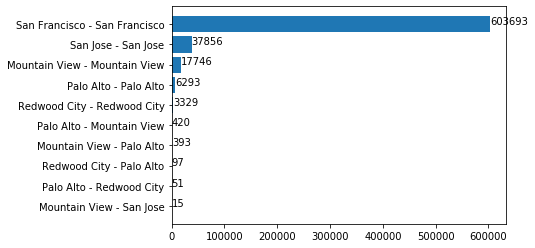

In [1425]:
# Plotting the  data

height = df_main_route['id_x']
bars = df_main_route['city_trip']
y_pos = np.arange(len(bars))
 
    # Create horizontal bars
plt.barh(y_pos, height)

plt.yticks(y_pos, bars)

for index, value in enumerate(height):
    plt.text(value, index, str(value))
 
# Show graphic
plt.show()


**Note:**
The majority of the trips are within the same city, I'll exclude these to look at most common intercities route

In [1426]:
# Excluding intracities route

df_main_route_inter =df.query('start_city != end_city').reset_index()


In [1427]:
# Pivoting the data to get the main route with average duration and ride count

df_main_route_inter = pd.pivot_table(data=df_main_route_inter, index=['city_trip'], values=['duration', 'id_x'], aggfunc={'duration':'median', 'id_x': 'nunique'}).reset_index().sort_values('id_x', ascending=False)

In [1428]:
df_main_route_inter = df_main_route_inter.groupby('city_trip')['id_x'].sum().nlargest(10).reset_index()
df_main_route_inter.sort_values('id_x',inplace=True)

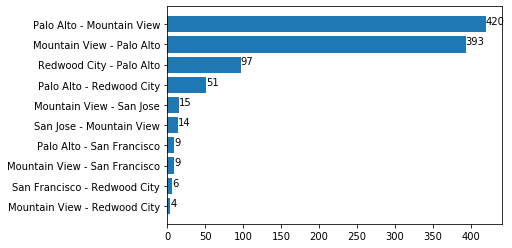

In [1429]:
# Plotting the  data

height = df_main_route_inter['id_x']
bars = df_main_route_inter['city_trip']
y_pos = np.arange(len(bars))
 
    # Create horizontal bars
plt.barh(y_pos, height)

 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
for index, value in enumerate(height):
    plt.text(value, index, str(value))
    
# Show graphic
plt.show()

## PART III - EXPLANATORY PART

<ul>I will first include an overview of the Ford GoBike activity in SF from 2013 to 2015</ul>
<li>I will review the station distribution per city and their usage</li>
<li>I will look at the average ride duration per city and the main routes</li>
<ul>The main analysis will be a behavioral analysis of SFers</ul>
<li>I will look at th different type of user and how their behaviour differ</li>
<li>I will look at the impact of weather conditions on bike usage</li>

<ul>At the end of my analysis, I will have a clear view of the Ford GoBike activity in SF, understand the user behaviour and the main external impact</ul>

### 3.1 Data visualisation for the Introduction

### In which cities are the stations located and how many stations are there in each?

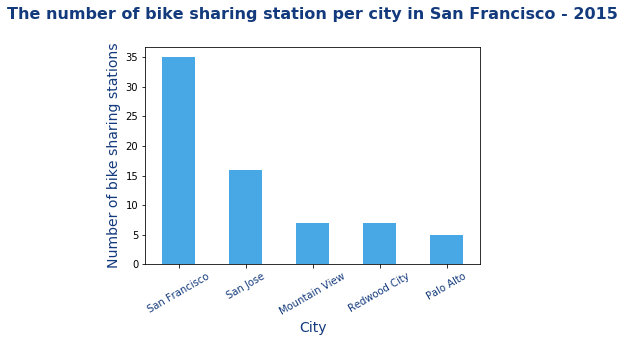

In [1430]:
# Plotting the number of station per city 

df_city = df_station.groupby('city')['id'].count().nlargest(10).plot(kind='bar', color='#47A8E5')
plt.xticks(rotation = 30,color='#133A7C')
xlabel = plt.xlabel('City', fontsize=14, color='#133A7C')
xlabel.set_position([0.5, 1.2])
ylabel = plt.ylabel('Number of bike sharing stations', fontsize=14,color='#133A7C')


title = plt.title('The number of bike sharing station per city in San Francisco - 2015', fontsize=16,color='#133A7C',fontweight="bold");
title.set_position([0.5, 1.1])

In [1431]:
# Changing the data in %
df_city = df_station.groupby('city')['id'].count().nlargest(10).reset_index()

In [1432]:
total_station = df_city['id'].sum()
df_city['percentage'] = df_city['id']/total_station


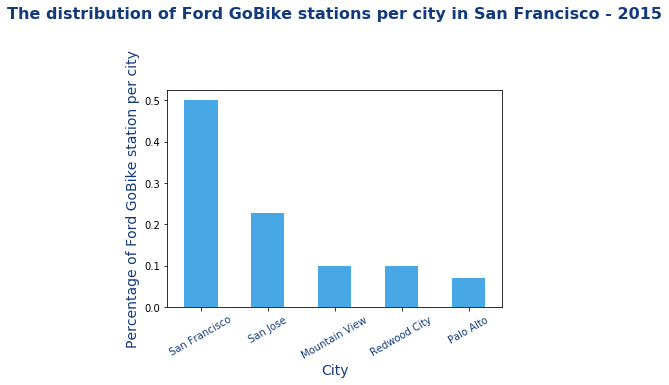

In [1433]:
# Plotting the new dataset 

df_city_pct = df_city.groupby('city')['percentage'].sum().nlargest(10).plot(kind='bar', color='#47A8E5')
plt.xticks(rotation = 30,color='#133A7C')
xlabel = plt.xlabel('City', fontsize=14, color='#133A7C')
xlabel.set_position([0.5, 1.2])
ylabel = plt.ylabel('Percentage of Ford GoBike station per city', fontsize=14,color='#133A7C')

title = plt.title('The distribution of Ford GoBike stations per city in San Francisco - 2015', fontsize=16,color='#133A7C',fontweight="bold");
title.set_position([0.5, 1.3])

### How many daily bike rides have been reported in each city?

In [1434]:
total_days_station = df.groupby('start_city')['date'].nunique().nlargest(10).reset_index()

total_ride_station = df.groupby('start_city')['id_x'].nunique().nlargest(10).reset_index()

In [1435]:
 total_station = pd.merge(total_days_station, total_ride_station, how='left', left_on=['start_city'], right_on=['start_city'])

In [1436]:
 total_station['rides_per_day'] =  total_station['id_x']/ total_station['date']

In [1437]:
 total_station.drop(['date', 'id_x'], axis=1, inplace=True)

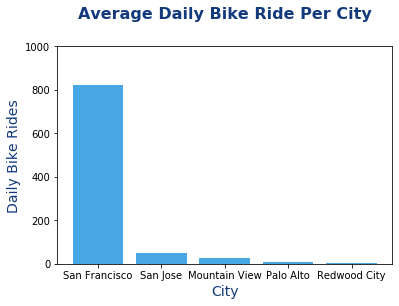

In [1438]:

height = total_station['rides_per_day']
bars = total_station['start_city']
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height,color='#47A8E5') 
title = plt.title('Average Daily Bike Ride Per City',color='#133A7C', fontsize=16, fontweight="bold")
plt.xlabel('City',color='#133A7C', fontsize = 14)
plt.ylabel('Daily Bike Rides',color='#133A7C', fontsize=14)
plt.ylim(0,1000)
plt.xticks(y_pos, bars)
title.set_position([0.5, 1.1])
 
plt.show()


In [1439]:
total_daily_rides = total_station['rides_per_day'].sum()
total_station['ride_pct'] =  total_station['rides_per_day']/ total_daily_rides

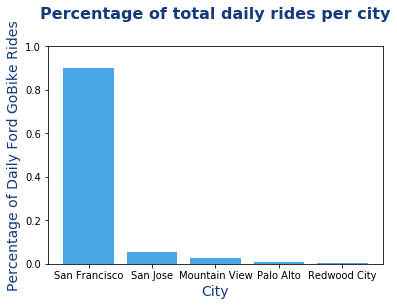

In [1440]:
height = total_station['ride_pct']
bars = total_station['start_city']
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height,color='#47A8E5') 
title = plt.title('Percentage of total daily rides per city',color='#133A7C', fontsize=16, fontweight="bold")
plt.xlabel('City',color='#133A7C', fontsize = 14)
plt.ylabel('Percentage of Daily Ford GoBike Rides',color='#133A7C', fontsize=14)
plt.ylim(0,1)
plt.xticks(y_pos, bars)
title.set_position([0.5, 1.1])
 
plt.show()

### Low Usage stations

In [1441]:
total_days_stationname = df.groupby(['startname','start_city'])['date'].nunique().reset_index()

total_ride_stationname = df.groupby(['startname','start_city'])['id_x'].nunique().reset_index()
total_dock_stationname = df.groupby(['startname','start_city'])['start_dock_ct'].sum().reset_index()

In [1442]:
 total_stationname = pd.merge(total_days_stationname, total_ride_stationname, how='left', left_on=['startname'], right_on=['startname'])

In [1443]:
total_stationname = pd.merge(total_stationname,total_dock_stationname , how='left', left_on=['startname'], right_on=['startname'])

In [1444]:
total_stationname['daily_ride'] = total_stationname['id_x'] / total_stationname['date']

In [1445]:
total_stationname.head()

,startname,start_city_x,date,start_city_y,id_x,start_city,start_dock_ct,daily_ride
0,2nd at Folsom,San Francisco,728,San Francisco,15940,San Francisco,302860,21.895604
1,2nd at South Park,San Francisco,728,San Francisco,18496,San Francisco,277440,25.406593
2,2nd at Townsend,San Francisco,731,San Francisco,25837,San Francisco,697599,35.344733
3,5th at Howard,San Francisco,732,San Francisco,13526,San Francisco,202890,18.478142
4,Adobe on Almaden,San Jose,509,San Jose,1257,San Jose,23883,2.469548


In [1446]:
low_usage_station = total_stationname.query('daily_ride < 5').reset_index()


In [1447]:
low_usage_station = low_usage_station.groupby(['start_city_x', 'startname'])['daily_ride'].sum().reset_index()


In [1448]:
low_usage_station.head()

,start_city_x,startname,daily_ride
0,Mountain View,Castro Street and El Camino Real,3.854167
1,Mountain View,Evelyn Park and Ride,2.950442
2,Mountain View,Mountain View City Hall,4.805153
3,Mountain View,Rengstorff Avenue / California Street,2.142315
4,Mountain View,San Antonio Caltrain Station,3.378608


### 3.2 Data visualisation for the Main Analysis

### USER TYPE:

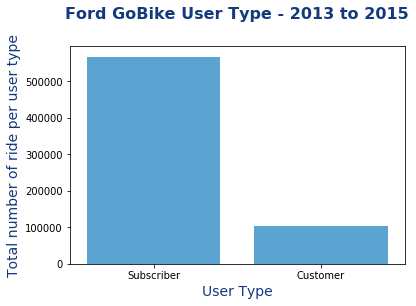

In [1662]:
sb.countplot(data=df, x= 'subscription_type',color='#47A8E5');
title = plt.title('Ford GoBike User Type - 2013 to 2015',color='#133A7C', fontsize=16, fontweight="bold")
plt.xlabel('User Type',color='#133A7C', fontsize = 14)
plt.ylabel('Total number of ride per user type',color='#133A7C', fontsize=14)
title.set_position([0.5, 1.1])



### USAGE HEATMAP - ALL USERS

Text(33.0, 0.5, 'Hour Of The Day')

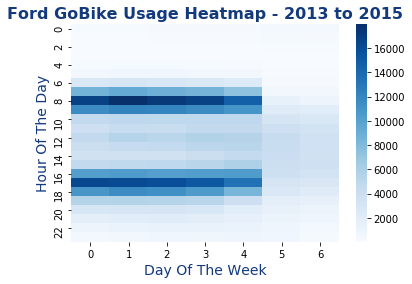

In [1450]:
sb.heatmap(heatmap,cmap="Blues");
title = plt.title('Ford GoBike Usage Heatmap - 2013 to 2015',color='#133A7C', fontsize=16, fontweight="bold")
plt.xlabel('Day Of The Week',color='#133A7C', fontsize = 14)
plt.ylabel('Hour Of The Day',color='#133A7C', fontsize=14)

### USAGE HEATMAP - Subscribers

In [1451]:
#filtering the dataframe by subscribers

dfhm2 = df.query('subscription_type == "Subscriber"')

In [1452]:
#Creating a separate dataframe with the 3 informations I need 

dfhm2 = dfhm2.groupby(['start_hour', 'start_day_week'])['id_x'].count()

In [1453]:
# Resetting the index

dfhm2 = dfhm2.reset_index()

In [1454]:
# Pivoting the data

heatmap2 = dfhm2.pivot('start_hour', 'start_day_week', 'id_x').sort_values('start_hour', ascending=True)



Text(33.0, 0.5, 'Hour Of The Day')

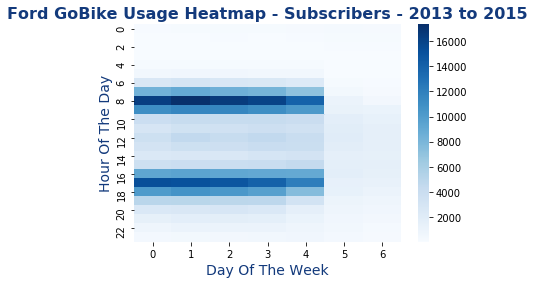

In [1455]:
sb.heatmap(heatmap2,cmap="Blues");
title = plt.title('Ford GoBike Usage Heatmap - Subscribers - 2013 to 2015',color='#133A7C', fontsize=16, fontweight="bold")
plt.xlabel('Day Of The Week',color='#133A7C', fontsize = 14)
plt.ylabel('Hour Of The Day',color='#133A7C', fontsize=14)

### USAGE HEATMAP - Non-Subscribers

In [1456]:
#filtering the dataframe by subscribers

dfhm3 = df.query('subscription_type == "Customer"')

In [1457]:
#Creating a separate dataframe with the 3 informations I need 

dfhm3 = dfhm3.groupby(['start_hour', 'start_day_week'])['id_x'].count()

In [1458]:
# Resetting the index

dfhm3 = dfhm3.reset_index()

In [1459]:
# Pivoting the data

heatmap3 = dfhm3.pivot('start_hour', 'start_day_week', 'id_x').sort_values('start_hour', ascending=True)




Text(33.0, 0.5, 'Hour Of The Day')

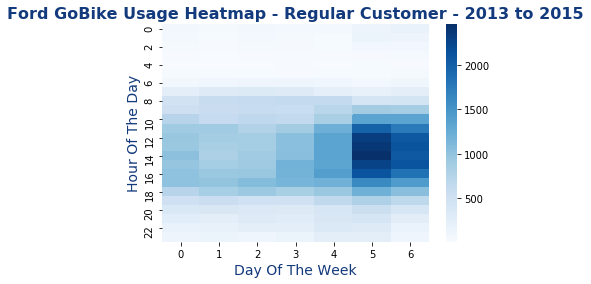

In [1460]:
sb.heatmap(heatmap3,cmap="Blues");
title = plt.title('Ford GoBike Usage Heatmap - Regular Customer - 2013 to 2015',color='#133A7C', fontsize=16, fontweight="bold")
plt.xlabel('Day Of The Week',color='#133A7C', fontsize = 14)
plt.ylabel('Hour Of The Day',color='#133A7C', fontsize=14)

### Main route - ALL 

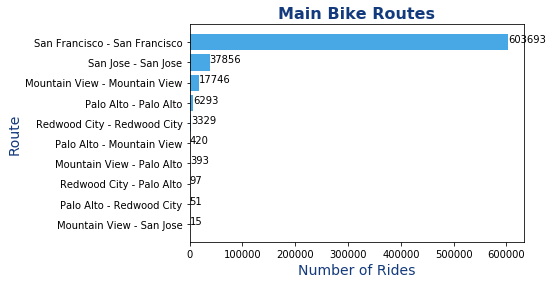

In [1465]:
# Plotting the  data

height = df_main_route['id_x']
bars = df_main_route['city_trip']
y_pos = np.arange(len(bars))
 
    # Create horizontal bars
plt.barh(y_pos, height,color='#47A8E5')

plt.yticks(y_pos, bars)

for index, value in enumerate(height):
    plt.text(value, index, str(value))
     
title = plt.title('Main Bike Routes',color='#133A7C', fontsize=16, fontweight="bold")
plt.xlabel('Number of Rides',color='#133A7C', fontsize = 14)
plt.ylabel('Route',color='#133A7C', fontsize=14)


 
# Show graphic
plt.show()

### Main route - INTERCITIES ONLY

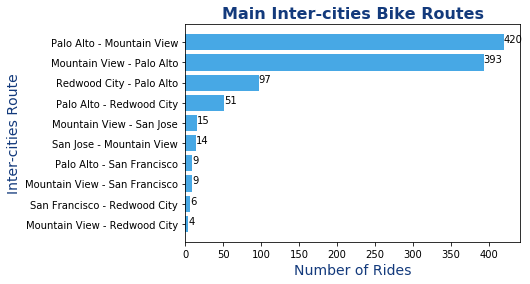

In [1466]:
# Plotting the  data

height = df_main_route_inter['id_x']
bars = df_main_route_inter['city_trip']
y_pos = np.arange(len(bars))
 
    # Create horizontal bars
plt.barh(y_pos, height,color='#47A8E5')

 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
for index, value in enumerate(height):
    plt.text(value, index, str(value))
    
title = plt.title('Main Inter-cities Bike Routes',color='#133A7C', fontsize=16, fontweight="bold")
plt.xlabel('Number of Rides',color='#133A7C', fontsize = 14)
plt.ylabel('Inter-cities Route',color='#133A7C', fontsize=14)


    
# Show graphic
plt.show()

### RIDE DURATION ANALYSIS

In [1538]:

dfd1 = df.groupby('start_city')['duration'].mean().reset_index()


In [1539]:
dfd1['average_trip'] = dfd1['duration']/60

**AVERAGE TRIP DURATION**

In [1541]:
df_averagetrip = pd.pivot_table(data=dfd1, index=['start_city'], values=['average_trip'], aggfunc={'average_trip':'median'}).reset_index().sort_values('average_trip', ascending=False)

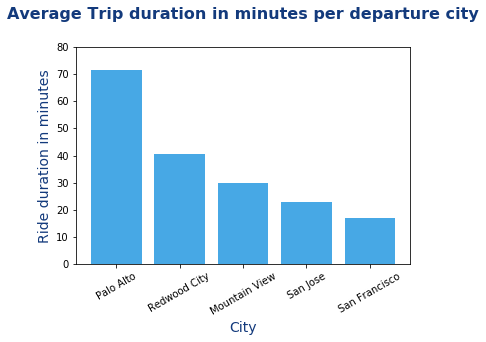

In [1546]:
height = df_averagetrip['average_trip']
bars = df_averagetrip['start_city']
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height,color='#47A8E5') 
title = plt.title('Average Trip duration in minutes per departure city',color='#133A7C', fontsize=16, fontweight="bold")
plt.xlabel('City',color='#133A7C', fontsize = 14)
plt.ylabel('Ride duration in minutes',color='#133A7C', fontsize=14)
plt.ylim(0,80)
plt.xticks(rotation = 30)
plt.xticks(y_pos, bars)
title.set_position([0.5, 1.1])
 
plt.show()

### WEATHER IMPACT

IMPACT OVERTME

In [1576]:
# Filtering out the months without full data

proper_daterange = df.query('month_year_start > = "2013-09-01"').reset_index()

In [1602]:
# Pivoting the month, temperature mean and count of ride id
dfmt2 = pd.pivot_table(data=proper_daterange, index=['month_year_start'], values=['mean_temperature_f', 'id_x'], aggfunc={'mean_temperature_f':'median', 'id_x': 'count'}).reset_index()

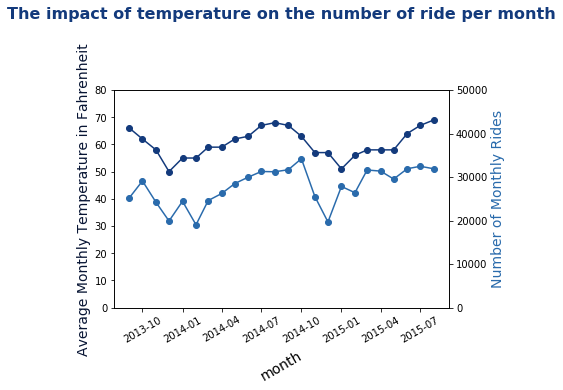

In [1680]:
# Adding 2 y axis, I used this article to understand how to do it: https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

fig,ax = plt.subplots()
ax.plot( dfmt2.month_year_start, dfmt2.mean_temperature_f, color='#133A7C', marker="o")
# set x-axis label
ax.set_xlabel("month",fontsize=14, rotation = 30)
plt.xticks(rotation =30)
# set y-axis label
ax.set_ylabel("Average Monthly Temperature in Fahrenheit",color='#081534',fontsize=14)
ax.set_ylim([0,80])
# twin object for the y-axis
ax2=ax.twinx()
ax2.plot(dfmt2.month_year_start, dfmt2['id_x'],color='#2A6BAC',marker="o")
ax2.set_ylabel("Number of Monthly Rides",color='#2A6BAC',fontsize=14)
ax2.set_ylim([0,50000])

title = plt.title('The impact of temperature on the number of ride per month',color='#133A7C', fontsize=16, fontweight="bold")
title.set_position([0.5, 1.3])
plt.show()

OVERALL IMPACT

In [1547]:
#Pivoting the data

avgtemp = pd.pivot_table(data=df, index=['mean_temperature_f'], values=['id_x'], aggfunc={'id_x': 'nunique'}).reset_index()

Text(0, 0.5, 'Number of Bike Rides')

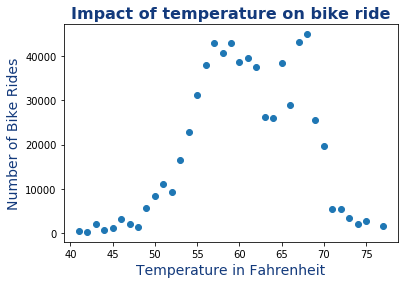

In [1553]:
plt.scatter(data=avgtemp, x='mean_temperature_f', y= 'id_x')

title = plt.title('Impact of temperature on bike ride',color='#133A7C', fontsize=16, fontweight="bold")
plt.xlabel('Temperature in Fahrenheit',color='#133A7C', fontsize = 14)
plt.ylabel('Number of Bike Rides',color='#133A7C', fontsize=14)

### WEATHER IMPACT BY USER TYPE

In [1567]:
# Filtering for both type

dftempsub = df.query('subscription_type == "Subscriber"').reset_index()
dftempcust = df.query('subscription_type == "Customer"').reset_index()

In [1568]:
#Pivoting the data

avgtempsub = pd.pivot_table(data=dftempsub, index=['mean_temperature_f'], values=['id_x'], aggfunc={'id_x': 'nunique'}).reset_index()

Text(0, 0.5, 'Number of Bike Rides')

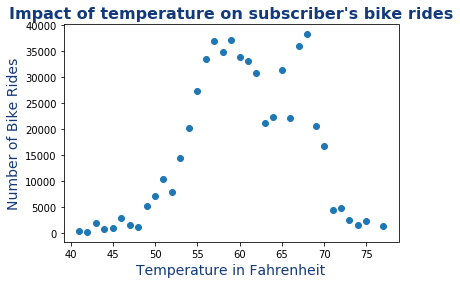

In [1560]:
plt.scatter(data=avgtempsub, x='mean_temperature_f', y= 'id_x')

title = plt.title("Impact of temperature on subscriber's bike rides",color='#133A7C', fontsize=16, fontweight="bold")
plt.xlabel('Temperature in Fahrenheit',color='#133A7C', fontsize = 14)
plt.ylabel('Number of Bike Rides',color='#133A7C', fontsize=14)

In [1570]:
avgtempsub.corr()

,mean_temperature_f,id_x
mean_temperature_f,1.000000,0.262165
id_x,0.262165,1.000000


In [1565]:
# Pivoting the month, temperature mean and count of ride id
avgtempcustdt = pd.pivot_table(data=dftempcust, index=['month_year_start'], values=['mean_temperature_f', 'id_x'], aggfunc={'mean_temperature_f':'median', 'id_x': 'count'}).reset_index()

In [1561]:
#Pivoting the data

avgtempcust = pd.pivot_table(data=dftempcust, index=['mean_temperature_f'], values=['id_x'], aggfunc={'id_x': 'nunique'}).reset_index()

Text(0, 0.5, 'Number of Bike Rides')

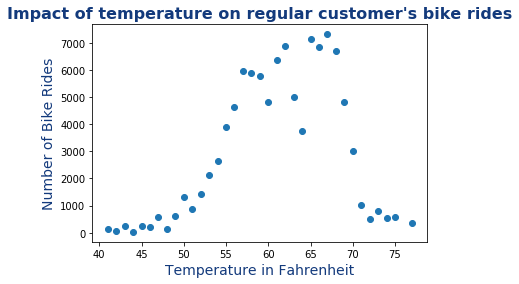

In [1562]:
plt.scatter(data=avgtempcust, x='mean_temperature_f', y= 'id_x')

title = plt.title("Impact of temperature on regular customer's bike rides",color='#133A7C', fontsize=16, fontweight="bold")
plt.xlabel('Temperature in Fahrenheit',color='#133A7C', fontsize = 14)
plt.ylabel('Number of Bike Rides',color='#133A7C', fontsize=14)

In [1569]:
avgtempcust.corr()

,mean_temperature_f,id_x
mean_temperature_f,1.00000,0.34802
id_x,0.34802,1.00000


IMPACT OF RAIN

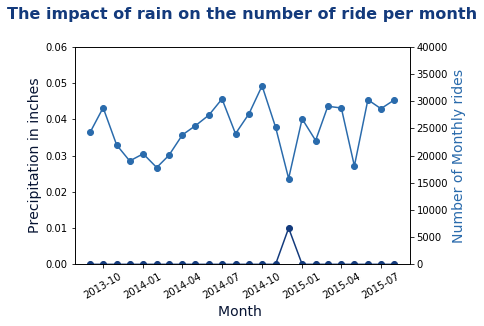

In [1649]:
fig,ax = plt.subplots()
ax.plot( dfp.month_year_start,dfp.precipitation_inches, color='#133A7C', marker="o")
# set x-axis label
ax.set_xlabel("Month ",color='#081534',fontsize=14)
plt.xticks(rotation =30)
# set y-axis label
ax.set_ylabel("Precipitation in inches",color='#081534',fontsize=14)
ax.set_ylim([0,0.06])
# twin object for the y-axis
ax2=ax.twinx()
ax2.plot(dfp.month_year_start, dfp['id_x'],color='#2A6BAC',marker="o")
ax2.set_ylabel("Number of Monthly rides",color='#2A6BAC',fontsize=14)
ax2.set_ylim([0,40000])

title = plt.title('The impact of rain on the number of ride per month',color='#133A7C', fontsize=16, fontweight="bold")
title.set_position([0.5, 1.1])
plt.show()